In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

 # create training data
X, y = make_classification(
    n_samples=10000,
    n_informative=10,
    random_state=2022
)

# first split into train and test
X_new, X_test = X[:9000, :], X[9000:, ]
y_new, y_test = y[:9000], y[9000:]

""" Training data further split into training and validation sets """
X_train, X_val, y_train, y_val = train_test_split(
    X_new, y_new,
    test_size=0.3
)
print(f"Train data: {X_train.shape}\n\
Train labels: {y_train.shape}\n\
Test data: {X_test.shape}\n\
Test labels: {y_test.shape}")

"""
Train data: (6300, 20)
Train labels: (6300,)
Test data: (1000, 20)
Test labels: (1000,)
"""

Train data: (6300, 20)
Train labels: (6300,)
Test data: (1000, 20)
Test labels: (1000,)


'\nTrain data: (6300, 20)\nTrain labels: (6300,)\nTest data: (1000, 20)\nTest labels: (1000,)\n'

In [8]:
# convert numpy arrays to tensors 
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

# build the model
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1

model = nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim),
    nn.Sigmoid()
    )

print(model)

Sequential(
  (0): Linear(in_features=20, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)


In [10]:
# Defining loss function and optimiser
import torch.optim as optim
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch 1/20, Loss: 0.0581
Epoch 2/20, Loss: 0.0580
Epoch 3/20, Loss: 0.0577
Epoch 4/20, Loss: 0.0581
Epoch 5/20, Loss: 0.0577
Epoch 6/20, Loss: 0.0575
Epoch 7/20, Loss: 0.0579
Epoch 8/20, Loss: 0.0579
Epoch 9/20, Loss: 0.0569
Epoch 10/20, Loss: 0.0573
Epoch 11/20, Loss: 0.0564
Epoch 12/20, Loss: 0.0566
Epoch 13/20, Loss: 0.0564
Epoch 14/20, Loss: 0.0563
Epoch 15/20, Loss: 0.0557
Epoch 16/20, Loss: 0.0563
Epoch 17/20, Loss: 0.0555
Epoch 18/20, Loss: 0.0555
Epoch 19/20, Loss: 0.0554
Epoch 20/20, Loss: 0.0552
Epoch 1/20, Loss: 0.0550
Epoch 2/20, Loss: 0.0549
Epoch 3/20, Loss: 0.0547
Epoch 4/20, Loss: 0.0549
Epoch 5/20, Loss: 0.0543
Epoch 6/20, Loss: 0.0550
Epoch 7/20, Loss: 0.0544
Epoch 8/20, Loss: 0.0536
Epoch 9/20, Loss: 0.0540
Epoch 10/20, Loss: 0.0535
Epoch 11/20, Loss: 0.0539
Epoch 12/20, Loss: 0.0537
Epoch 13/20, Loss: 0.0537
Epoch 14/20, Loss: 0.0534
Epoch 15/20, Loss: 0.0531
Epoch 16/20, Loss: 0.0527
Epoch 17/20, Loss: 0.0521
Epoch 18/20, Loss: 0.0523
Epoch 19/20, Loss: 0.0525
Epoc

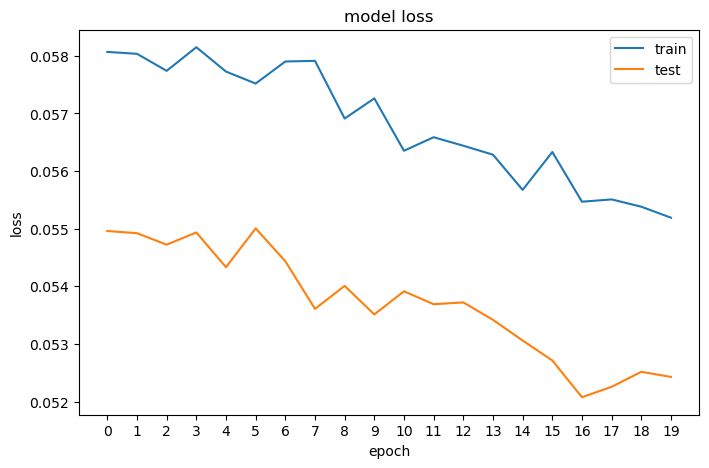

In [24]:
num_epochs = 20
train_loss = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for X, y in zip(X_train_tensor, y_train_tensor):
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        
        # accumulate loss
        epoch_loss += loss.item()
    
    # average loss for the epoch
    epoch_loss /= len(X_train_tensor)
    train_loss.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    
val_loss = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for X, y in zip(X_train_tensor, y_train_tensor):
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        
        # accumulate loss
        epoch_loss += loss.item()
    
    # average loss for the epoch
    epoch_loss /= len(X_train_tensor)
    val_loss.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# plotting the loss of the models
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0,20, step=1))
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Neural networks

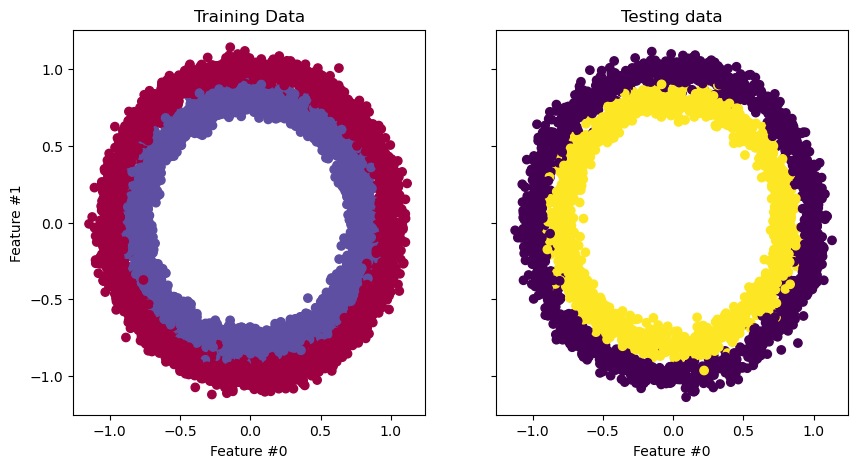

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Create a dataset with 10,000 samples.
X, y = make_circles(n_samples = 10000,
                    noise= 0.05,
                    random_state=26)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=26)

# Visualize the data.
fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 5))
train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
train_ax.set_title("Training Data")
train_ax.set_xlabel("Feature #0")
train_ax.set_ylabel("Feature #1")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
test_ax.set_title("Testing data")
plt.show()

In [6]:
import warnings
warnings.filterwarnings("ignore")

!pip install torch -q

import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 64

# Instantiate training and test data
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break


"""
Batch: 1
X shape: torch.Size([64, 2])
y shape: torch.Size([64])
"""

Batch: 1
X shape: torch.Size([64, 2])
y shape: torch.Size([64])


'\nBatch: 1\nX shape: torch.Size([64, 2])\ny shape: torch.Size([64])\n'

In [8]:
import torch
from torch import nn
from torch import optim

input_dim = 2
hidden_dim = 10
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))

        return x
       
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


In [11]:
learning_rate = 0.1

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
num_epochs = 100
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")

"""
Training Complete
"""

Training Complete


'\nTraining Complete\n'

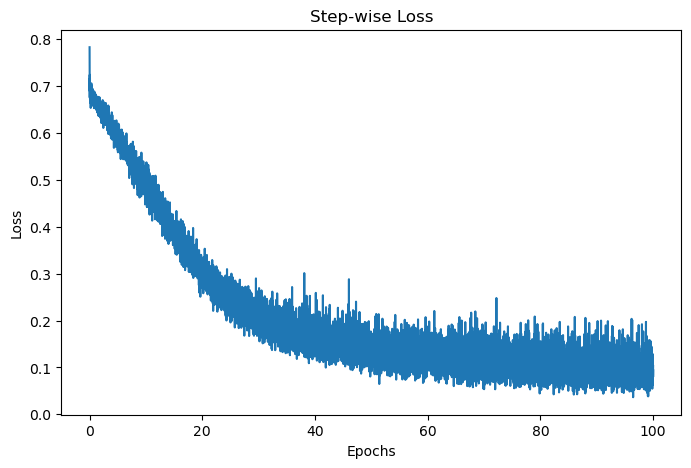

In [13]:
step = np.linspace(0, 100, 10500)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [34]:
"""
We're not training so we don't need to calculate the gradients for our outputs
"""
import itertools

y_pred = []
y_test = []
total = 0
correct = 0

with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs < 0.5, 0, 1)
        predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test.append(y)
        total += y.size(0)
        correct += (predicted == y.numpy()).sum().item()

print(f'Accuracy of the network on the 3300 test instances: {100 * correct // total:.1f}%')

Accuracy of the network on the 3300 test instances: 97.0%


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1635
         1.0       0.98      0.98      0.98      1665

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



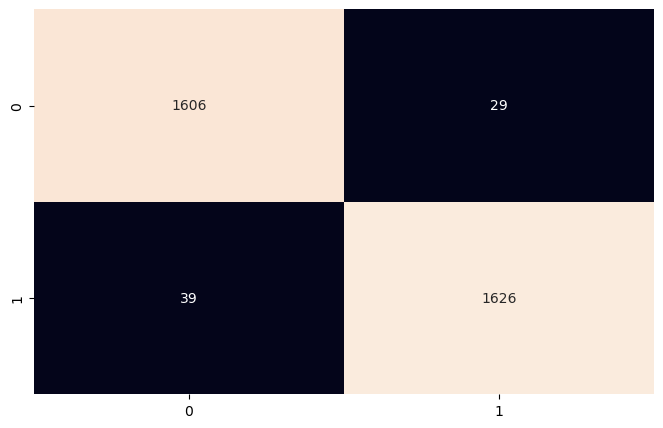

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns


y_pred = list(itertools.chain(*y_pred))
y_test = list(itertools.chain(*y_test))


print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

plt.subplots(figsize=(8, 5))

sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")

plt.show()